## variables***

In [185]:
go_term = "Vascular smooth muscle contraction"
top_n = 250

# go_term = "Cardiac muscle contraction"
# top_n = 50

block_size = 100

In [186]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests

# go to data folder to open EmptyDrops Metascape results
data_folder = "../13_Comparison-Fore_Background-metascape/pyEDsoup_human/Enrichment_GO/"
# open file "_FINAL_GO.csv" 
df = pd.read_csv(os.path.join(data_folder, "_FINAL_GO.csv"))

# get smooth vasc. musc. genes

In [187]:
# show all column names
print(df.columns)

# search for "Vascular smooth muscle contraction"

go_row = df[df['Description'] == go_term]
go_row

Index(['_MEMBER_Gene', '_LogP_Gene', 'GO', '_PATTERN_', '_RANK_', 'GiniIndex',
       'Category', 'CategoryID', 'Description', 'PARENT_GO', 'LogP',
       'Enrichment', 'Z-score', '#TotalGeneInLibrary', '#GeneInGO',
       '#GeneInHitList', '#GeneInGOAndHitList', '%InGO', 'STDV %InGO',
       'GeneID', 'Hits', 'Log(q-value)', 'EvidenceCutoff', 'GROUP_ID',
       'FirstInGroupByEnrichment', 'FirstInGroupByLogP', 'BestLogPInGroup',
       'BestEnrichmentInGroup', 'URL'],
      dtype='object')


,_MEMBER_Gene,_LogP_Gene,GO,_PATTERN_,_RANK_,GiniIndex,Category,CategoryID,Description,PARENT_GO,...,GeneID,Hits,Log(q-value),EvidenceCutoff,GROUP_ID,FirstInGroupByEnrichment,FirstInGroupByLogP,BestLogPInGroup,BestEnrichmentInGroup,URL
104,1,-7.833004,hsa04270,M1,1,0,KEGG Pathway,24,Vascular smooth muscle contraction,NaN,...,59|800|808|3708|4629|4638|4659|5583|5592|10266...,ACTA2|CALD1|CALM3|ITPR1|MYH11|MYLK|PPP1R12A|PR...,-4.744868,0,6,1,1,-7.833004,21.290618,NaN


## save as pathway_genes

In [188]:
go_hits = go_row['Hits']
go_hits = go_hits.to_list()
# split the string into a list
go_hits = go_hits[0].split('|')
go_hits

['ACTA2',
 'CALD1',
 'CALM3',
 'ITPR1',
 'MYH11',
 'MYLK',
 'PPP1R12A',
 'PRKCH',
 'PRKG1',
 'RAMP2',
 'IRAG1']

# vergleiche mit ED Foreground 

In [189]:
# open emptydrops file
import scanpy as sc
foreground = sc.read_h5ad("../data/pyED_correct.h5ad")
foreground

foreground.obs

,Total,PValue,Limited,LogProb,FDR
AAACAGCCAATTGAGA-1,11029.0,0.0001,True,-12113.973514,0.000000
AAACAGCCAGTCTAGC-1,1100.0,0.0001,True,-4236.984659,0.000226
AAACAGCCATCAGCAC-1,555.0,0.0001,True,-1855.411965,0.000226
AAACATGCAAACATAG-1,5911.0,0.0001,True,-12026.043137,0.000226
AAACATGCAAGATTCT-1,516.0,0.0001,True,-1801.832585,0.000226
...,...,...,...,...,...
TTTGTTGGTCACAGAC-1,2869.0,0.0001,True,-9640.391134,0.000226
TTTGTTGGTGCTTTAC-1,1134.0,0.0001,True,-2986.512009,0.000226
TTTGTTGGTGTCCAGG-1,8407.0,0.0001,True,-18229.162677,0.000226
TTTGTTGGTTAGGTGC-1,1268.0,0.0001,True,-3161.103808,0.000226


In [190]:
# sort after total UMI per cell (absteigend)
foreground = foreground[foreground.obs['Total'].sort_values(ascending=False).index]

# calculate how many blocks we need
n_cells = foreground.n_obs
block_size = 100
n_blocks = (n_cells + block_size - 1) // block_size 
print("n_cells: ", n_cells)
print("n_blocks: ", n_blocks, " bei blocksize von 100")

# create first block
print(foreground.shape)
block_1 = foreground[0:block_size]
print(block_1.shape)
print(block_1)

# make block1 to dataframe
block_1_df = block_1.to_df()
print(block_1_df)

n_cells:  8202
n_blocks:  83  bei blocksize von 100
(8202, 22040)
(100, 22040)
View of AnnData object with n_obs × n_vars = 100 × 22040
    obs: 'Total', 'PValue', 'Limited', 'LogProb', 'FDR'
    var: 'gene_ids', 'feature_types', 'genome', 'interval'
    uns: 'empty_drops'
                    ALDH1A1  ANXA1  RORB  TRPM6  C9orf40  CARNMT1  NMRK1  \
GCAGCTATCTCGCCCA-1     14.0    6.0   0.0   11.0     32.0      6.0   13.0   
GTGGCTTCACAGCCTG-1     16.0    2.0   7.0    4.0      5.0      5.0    4.0   
CTTAAGGGTATTGGTG-1      5.0    7.0   3.0    2.0      6.0      1.0    3.0   
TCACATAAGTTAGTTG-1      6.0    5.0   0.0    2.0      9.0      1.0    2.0   
CTCCGTCCATTGTGAT-1      1.0    1.0   4.0    1.0      2.0      2.0    5.0   
...                     ...    ...   ...    ...      ...      ...    ...   
CCTTTAGTCAGCATTA-1      0.0    0.0   0.0    0.0      1.0      0.0    1.0   
CGATTATCAGCTAATT-1      0.0    0.0   0.0    1.0      1.0      0.0    1.0   
GGTCCATCATTGTGCA-1      0.0    0.0   0.0  

## function ***

In [191]:


# counts: DatafRFrame genes x cells (integers)
# pathway_genes: set/list of gene symbols (from Metascape)
def enrichment_by_blocks(anndata, pathway_genes, block_id, start_idx, end_idx, block_size, top_n):
    # log foreground um ausreißer wie hier zu vermeiden: 
    # CALM3 3333.0 
    # PLCB1 894.0 
    # KCNU1 422.0 
    # PRKG1 369.0 
    # PRKCH 318.0 
    # CACNA1D 292.0 
    # CALD1 229.0 
    # RAMP2 203.0
    # counts: genes x cells
    counts = anndata.to_df().T  # genes x cells (raw counts)
    
    # cpm
    cell_totals = counts.sum(axis=0)  # sum per cell
    cpm = (counts / cell_totals) * 1e6  # normalize each cell
    
    # finde top gene
    gene_totals_cpm = cpm.sum(axis=1)  # sum CPM across all cells
    
    # filter
    expressed_genes = gene_totals_cpm[gene_totals_cpm > 0].index
    pathway_set = set(pathway_genes) & set(expressed_genes)
    
    #N = cpm.shape[0]  # alle Gene im Hintergrund
    N = len(set(expressed_genes))  # union of all expressed genes across blocks
    # test = all genes more than >0 expressed UMI count
    K = len(pathway_set)
    
    results = []
    top_pathway_genes_all = set()  

    # For the block, find top N genes based on CPM
    top_genes = gene_totals_cpm.nlargest(top_n).index
    
    # Overlap mit Pathway
    observed = len(set(top_genes) & pathway_set)
    top_pathway_genes_all.update(set(top_genes) & pathway_set)
    
    if observed == 0:
        print("Kein Pathway-Gen im Anndata block nr.", block_id, " exprimiert!")
    
    
    expected = (top_n * K) / N
    fold = observed / expected if expected > 0 else np.nan
    pval = hypergeom.sf(observed-1, N, K, top_n)
    mean_umi = anndata.obs['Total'].mean()
    
    results.append({
        'block_index': block_id,
        'start_cell': start_idx+1,
        'end_cell': end_idx,
        'n_cells': end_idx - start_idx,
        'observed': observed,
        'expected': expected,
        'fold_enrichment': fold,
        'pval': pval,
        'mean_umi': mean_umi,
        'Total': anndata.obs['Total'].sum(),
    })
    
    df = pd.DataFrame(results)
    return df, top_pathway_genes_all

df_results, pathway_set = enrichment_by_blocks(block_1, go_hits, 0, 1, 100, 100, 300)
#df_results.to_csv("pathway_enrichment_by_blocks.csv", index=False)

## check gene expression

In [192]:
present = [g for g in set(go_hits) if g in block_1.var_names]
missing = [g for g in set(go_hits) if g not in block_1.var_names]
print("In var_names vorhanden:", present)
print("Nicht in var_names:", missing)

counts = block_1.to_df().T  # genes x cells
counts = np.log1p(counts)
gene_totals = counts.sum(axis=1)  # Summe über alle Zellen
pathway_totals = pd.Series({g: gene_totals.get(g, 0) for g in set(go_hits)})
print(pathway_totals.sort_values(ascending=False))


In var_names vorhanden: ['CALM3', 'PRKCH', 'CALD1', 'RAMP2', 'IRAG1', 'MYH11', 'ITPR1', 'PRKG1', 'ACTA2', 'PPP1R12A', 'MYLK']
Nicht in var_names: []
CALM3       321.056335
PPP1R12A    210.298325
MYLK        128.082031
ITPR1       101.348602
PRKCH        95.962128
PRKG1        83.809143
CALD1        81.770851
RAMP2        69.651306
ACTA2        59.087067
MYH11        58.674595
IRAG1        37.276428
dtype: float32


In [193]:
print(df_results)
print(pathway_set)

   block_index  start_cell  end_cell  n_cells  observed  expected  \
0            0           2       100       99         1  0.182169   

   fold_enrichment      pval      mean_umi      Total  
0         5.489394  0.167853  38546.941406  3854694.0  
{'CALM3'}


## generate blocks

In [194]:
blocks = []
for i in range(n_blocks):
    start_idx = i * block_size
    end_idx = min((i + 1) * block_size, n_cells)
    block_indices = range(start_idx, end_idx)
    block = foreground[start_idx:end_idx]
    Total = block.obs["Total"].sum()
    blocks.append({
        'block_id': i + 1,
        'start_idx': start_idx,
        'end_idx': end_idx,
        'n_cells': len(block_indices),
        'block_data': block,
        'Total': Total,
    })

# Convert to DataFrame for easy access
blocks_df = pd.DataFrame(blocks)
print(f"Created {len(blocks)} blocks")
print(blocks_df[['block_id', 'start_idx', 'end_idx', 'n_cells', 'Total']])

print("BLOCK_DATA: ", blocks_df.head(1)['block_data'][0].shape)

Created 83 blocks
    block_id  start_idx  end_idx  n_cells      Total
0          1          0      100      100  3854694.0
1          2        100      200      100  1988154.0
2          3        200      300      100  1583720.0
3          4        300      400      100  1315649.0
4          5        400      500      100  1153200.0
..       ...        ...      ...      ...        ...
78        79       7800     7900      100    13736.0
79        80       7900     8000      100    12742.0
80        81       8000     8100      100    11682.0
81        82       8100     8200      100    10658.0
82        83       8200     8202        2      202.0

[83 rows x 5 columns]
BLOCK_DATA:  (100, 22040)


## iterate function ***

In [195]:
# create results dataframe
results_blocks_df = pd.DataFrame(columns=(df_results.columns).append(pd.Index(['pathway_set'])))
print(results_blocks_df)
print(results_blocks_df.shape)

# iterate over blocks and calculate enrichment for each block
for idx, block_row in blocks_df.iterrows():
    block_data = block_row['block_data']
    block_id = block_row['block_id']
    
    # Calculate enrichment for this block
    results_df, pathway_set = enrichment_by_blocks(anndata=block_data, pathway_genes=go_hits, block_id=block_id, start_idx=block_row['start_idx'], end_idx=block_row['end_idx'], block_size=block_size, top_n=top_n)
    
    # Add block_id for tracking
    #results_df['block_id'] = block_id
    results_df["pathway_set"] = [pathway_set]
    
    # Append to results dataframe
    results_blocks_df = pd.concat([results_blocks_df, results_df], ignore_index=True)

    # calculate adj_pval
    results_blocks_df['adj_pval'] = multipletests(results_blocks_df['pval'], method='fdr_bh')[1]

print(f"Completed enrichment analysis for {len(blocks_df)} blocks")
print(f"Total results: {len(results_blocks_df)} rows")
print(results_blocks_df.head(10))
print(results_blocks_df.shape)
print(results_blocks_df.columns)

Empty DataFrame
Columns: [block_index, start_cell, end_cell, n_cells, observed, expected, fold_enrichment, pval, mean_umi, Total, pathway_set]
Index: []
(0, 11)


/var/folders/06/zfzddxwn4hd0ywccb30sl4qw0000gn/T/ipykernel_17994/2907256541.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_blocks_df = pd.concat([results_blocks_df, results_df], ignore_index=True)


Completed enrichment analysis for 83 blocks
Total results: 83 rows
  block_index start_cell end_cell n_cells observed  expected  fold_enrichment  \
0           1          1      100     100        1  0.151808         6.587273   
1           2        101      200     100        1  0.158648         6.303273   
2           3        201      300     100        1  0.161045         6.209455   
3           4        301      400     100        1  0.163370         6.121091   
4           5        401      500     100        1  0.164042         6.096000   
5           6        501      600     100        1  0.166485         6.006545   
6           7        601      700     100        1  0.167601         5.966545   
7           8        701      800     100        1  0.170121         5.878182   
8           9        801      900     100        1  0.171457         5.832364   
9          10        901     1000     100        1  0.173327         5.769455   

       pval      mean_umi      Total path

## (bar) occurences pathway_genes

mean of observed:  1.3975903614457832  -- with top_n:  250


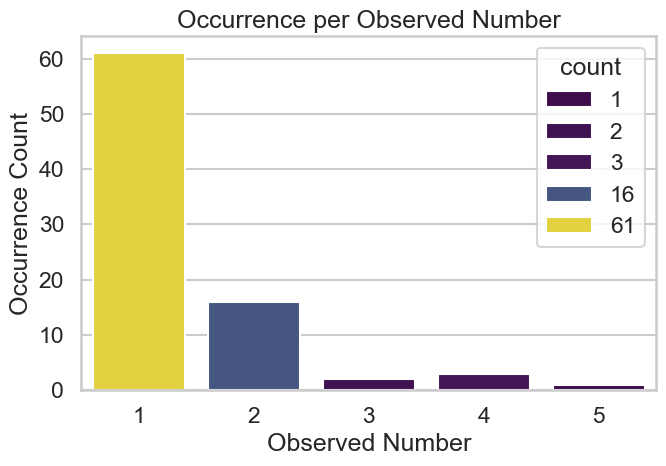

In [196]:
# mean of pathway_set_length
print("mean of observed: ", results_blocks_df['observed'].mean(), " -- with top_n: ", top_n)

plt.figure(figsize=(7, 5))
observed_counts = results_blocks_df['observed'].value_counts().sort_index()
ax = sns.barplot(x=observed_counts.index, y=observed_counts.values, palette="viridis", hue=observed_counts)
plt.title("Occurrence per Observed Number")
plt.xlabel("Observed Number")
plt.ylabel("Occurrence Count")
plt.tight_layout()
plt.show()

## (bar) total Umi count

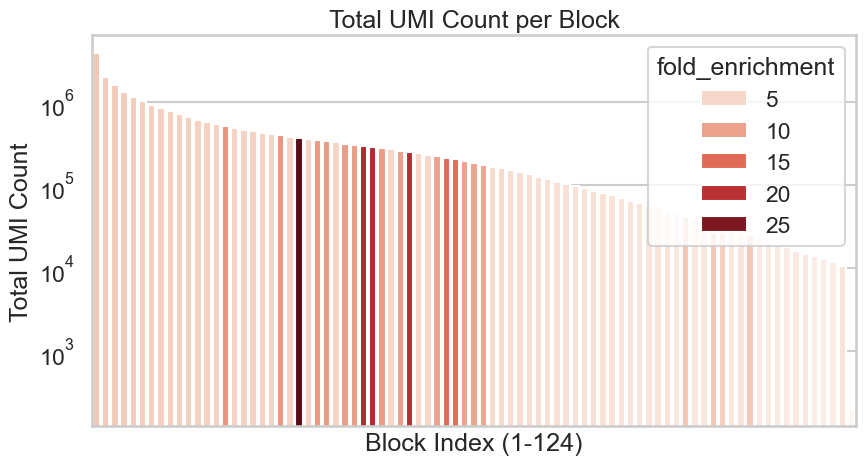

In [197]:
# Plot total UMI count per block_index as barplot
plt.figure(figsize=(9, 5))
sns.barplot(data=results_blocks_df, x="block_index", y="Total", palette="Reds", hue="fold_enrichment")
plt.title("Total UMI Count per Block")
plt.xlabel("Block Index (1-124)")
plt.ylabel("Total UMI Count")
plt.yscale('log')
plt.xticks([])
plt.tight_layout()
plt.show()


## (reg) fold/pval analyize

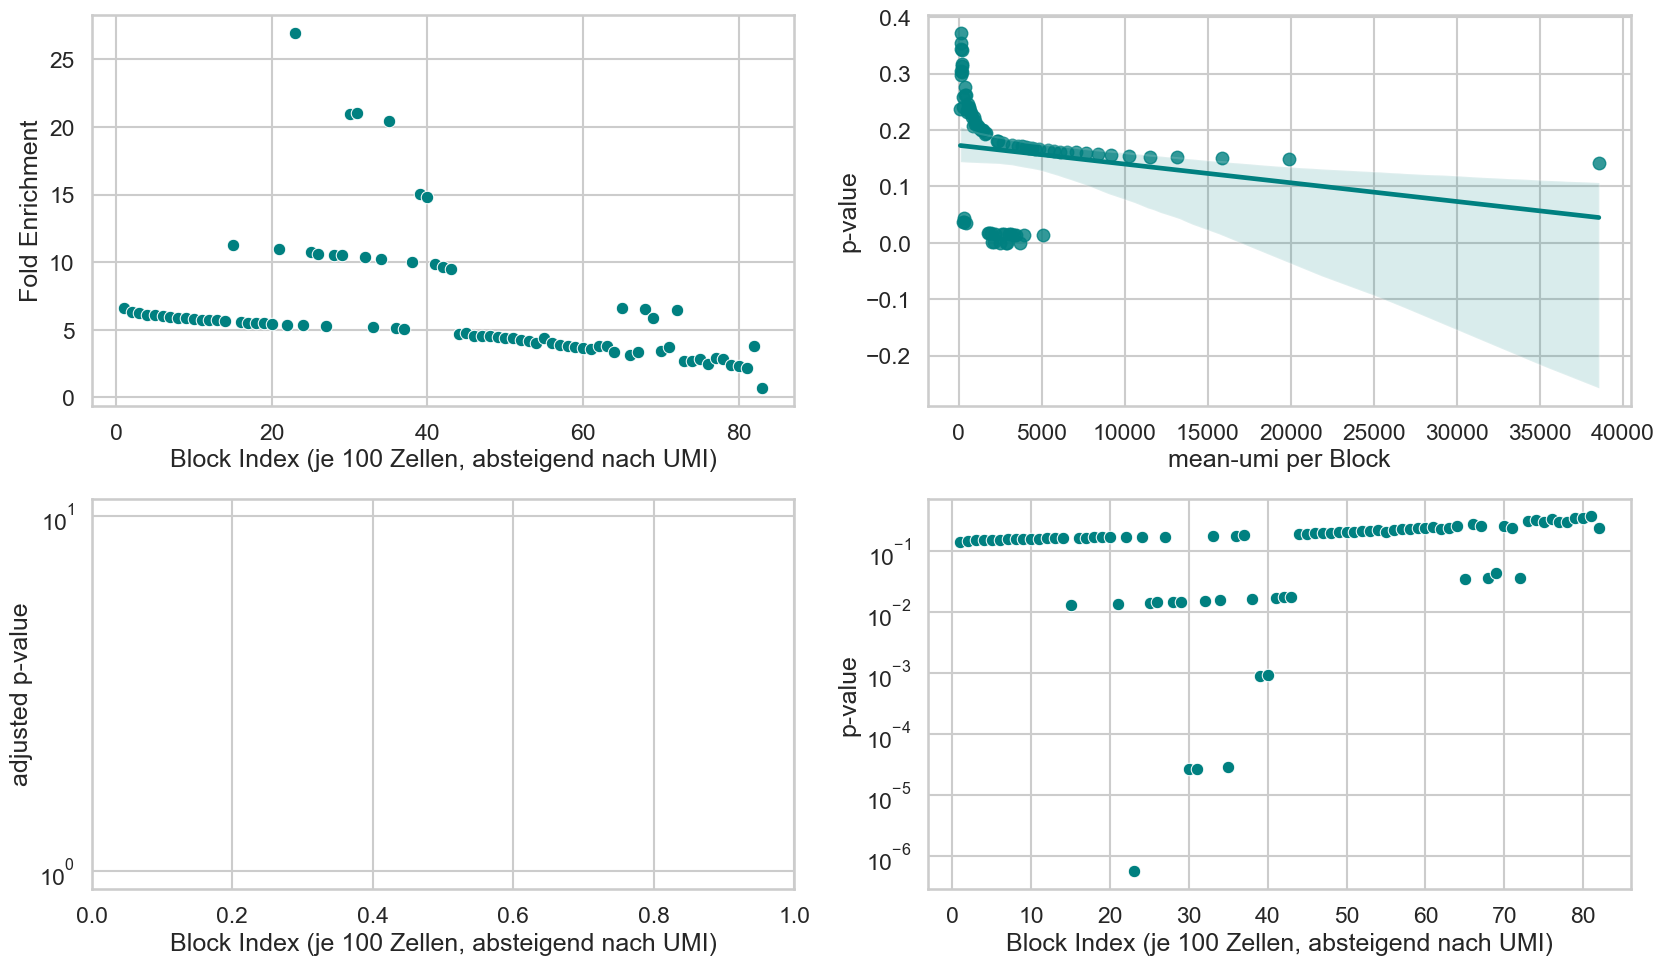

In [198]:
fig, ax = plt.subplots(2, 2, figsize=(17, 10))
sns.set(style="whitegrid", context="talk")


# 1 --- Fold enrichment über Block-Index
sns.scatterplot(data=results_blocks_df, x="block_index", y="fold_enrichment", color="teal", ax=ax[0,0])
ax[0,0].set_title("")
ax[0,0].set_xlabel("Block Index (je 100 Zellen, absteigend nach UMI)")
ax[0,0].set_ylabel("Fold Enrichment")


# 2 --- Mean UMI vs Fold Enrichment
#sns.scatterplot(data=results_blocks_df, x="mean_umi", y="fold_enrichment", s=80, color="teal", ax=ax[1])
sns.regplot(data=results_blocks_df, x="mean_umi", y="pval", scatter=True, color="teal", ax=ax[0,1])
ax[0,1].set_title("")
ax[0,1].set_xlabel("mean-umi per Block")
ax[0,1].set_ylabel("p-value")


# 3 --- adjusted p-value über Block-Index
sns.scatterplot(data=results_blocks_df, x="block_index", y="adj_pval", color="teal", ax=ax[1,0])
ax[1,0].set_title("")
ax[1,0].set_xlabel("Block Index (je 100 Zellen, absteigend nach UMI)")
ax[1,0].set_ylabel("adjusted p-value")
ax[1,0].set_yscale('log')


# 4 --- pval vs block_index
sns.scatterplot(data=results_blocks_df, x="block_index", y="pval", color="teal", ax=ax[1,1])
ax[1,1].set_title("")
ax[1,1].set_xlabel("Block Index (je 100 Zellen, absteigend nach UMI)")
ax[1,1].set_ylabel("p-value")
ax[1,1].set_yscale('log')

plt.savefig('pathway_genes_scatterplots.png')
plt.tight_layout()
plt.show()

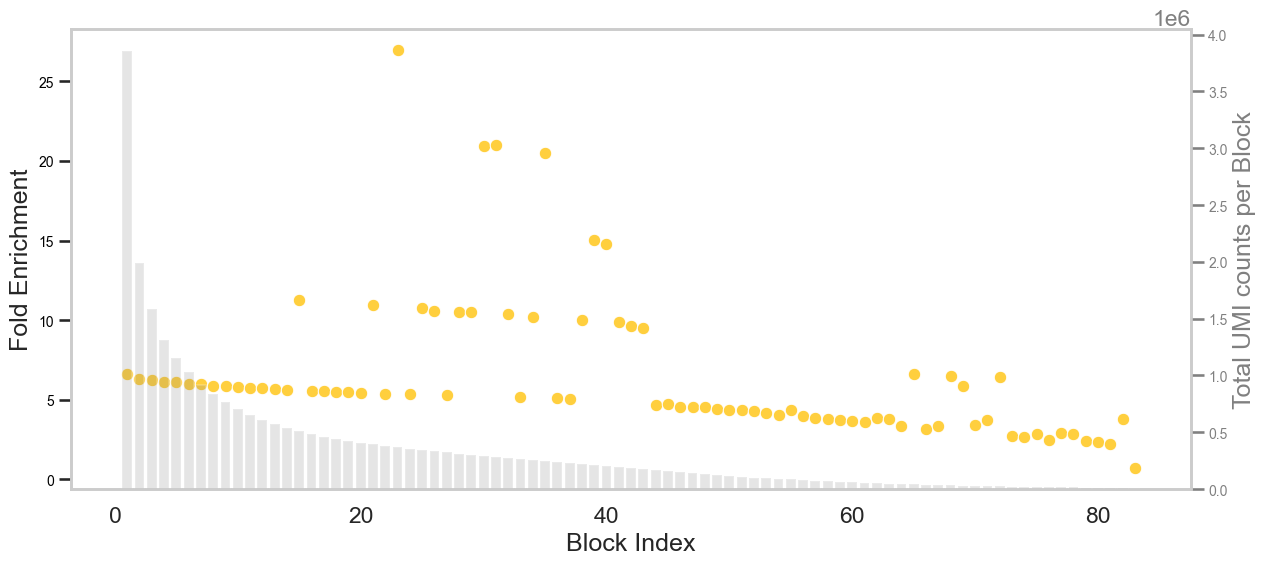

In [199]:
# Fold Enrichment per Block Index, with total_umi (scaled, desecreasing) in background

fig, ax1 = plt.subplots(figsize=(13, 6))

# Plot Fold Enrichment on primary y-axis
sns.scatterplot(data=results_blocks_df, x="block_index", y="fold_enrichment", color="#FFCF3E", ax=ax1)
ax1.set_xlabel("Block Index", )
ax1.set_ylabel("Fold Enrichment")
ax1.tick_params(axis='y', labelcolor='#000000', labelsize=10)
ax1.tick_params(axis='x', )
ax1.grid(False)  # Remove the grid

# Create secondary axis for total_umi; plot as (background, 0.3 alpha) as barplot
ax2 = ax1.twinx()
ax2.bar(
    results_blocks_df["block_index"],
    results_blocks_df["Total"],
    color='gray',
    alpha=0.2,
    label="total UMI"
)
# Show the scale (ticks and label) for total UMI axis
# (Simply remove or comment out ax2.set_yticks([]))
ax2.set_ylabel("Total UMI counts per Block", color="gray", )
ax2.tick_params(axis='y', left=False, labelleft=False, right=True, labelright=True, labelsize=10, labelcolor='gray', color='gray')
ax2.tick_params(axis='x', )
ax2.grid(False)  # Remove the grid

plt.savefig('pathway_log_enrichement-total_umi.png')
plt.tight_layout()
plt.show()

## (heatmap) pathway genes

Unique block_index values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]
Shape after explode: (116, 13)
Sample data:
  pathway block_index  fold_enrichment
0   CALM3           1         6.587273
1   CALM3           2         6.303273
2   CALM3           3         6.209455
3   CALM3           4         6.121091
4   CALM3           5         6.096000
5   CALM3           6         6.006545
6   CALM3           7         5.966545
7   CALM3           8         5.878182
8   CALM3           9         5.832364
9   CALM3          10         5.769455
Heatmap shape: (6, 83)
Columns in heatmap: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 3

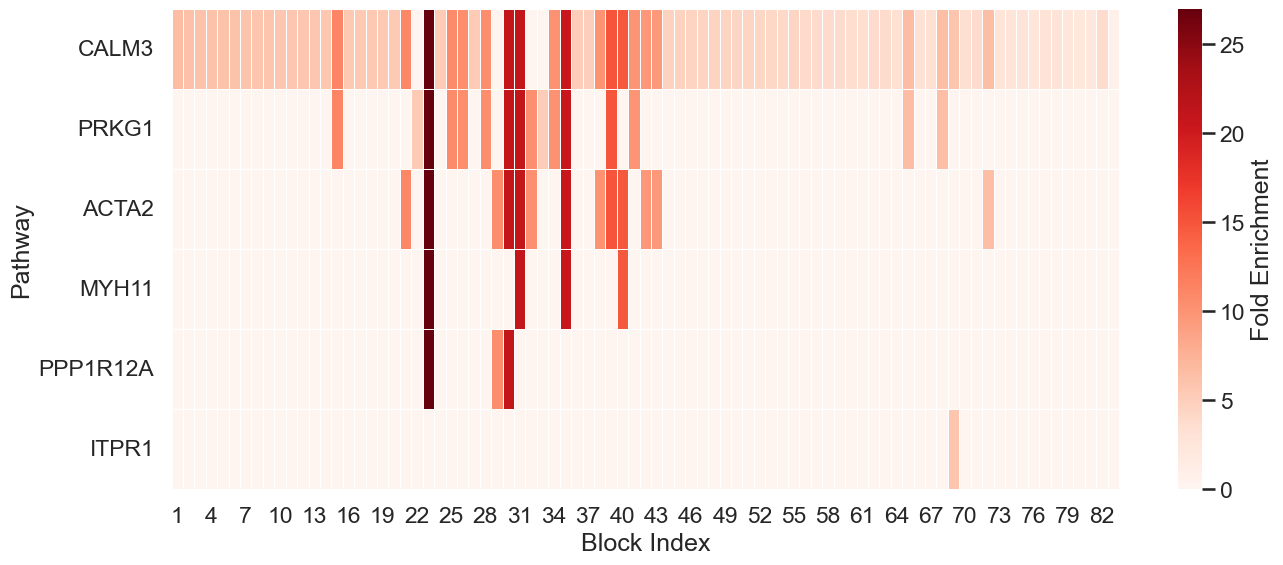

In [200]:
y_values = 'fold_enrichment'


# Schritt 1: pathway_set in eine Spalte pro Pathway bringen
# Da pathway_set in jeder Zelle ein Set ist, wandeln wir es zuerst in Liste um
results_blocks_df['pathway_list'] = results_blocks_df['pathway_set'].apply(list)

# Explode → eine Zeile pro Pathway
exploded_df = results_blocks_df.explode('pathway_list')
exploded_df = exploded_df.rename(columns={'pathway_list': 'pathway'})

# Debug: Schaue dir die Daten an
print("Unique block_index values:", sorted(exploded_df['block_index'].unique()))
print("Shape after explode:", exploded_df.shape)
print("Sample data:")
print(exploded_df[['pathway', 'block_index', y_values]].head(10))

# Schritt 2: Pivot für Heatmap - Fix für duplicate entries
# Erstelle einen eindeutigen Index durch Kombination von pathway und block_index
exploded_df = exploded_df.reset_index(drop=True)

# Verwende pivot_table statt pivot um Duplikate zu handhaben
heatmap_df = exploded_df.pivot_table(
    index='pathway',        # Zeilen = Pathway
    columns='block_index',  # Spalten = Block
    values=y_values,  # Wert = Fold Enrichment
    aggfunc='mean',  # Mittelwert bei Duplikaten
    fill_value=0  # Fülle fehlende Werte mit 0
)

print("Heatmap shape:", heatmap_df.shape)
print("Columns in heatmap:", list(heatmap_df.columns))

# Optional: sortieren nach mittlerem Enrichment (nur wenn Daten vorhanden)
if not heatmap_df.empty:
    heatmap_df = heatmap_df.loc[heatmap_df.mean(axis=1).sort_values(ascending=False).index]

# Schritt 3: Heatmap plotten
plt.figure(figsize=(14, 6))
if not heatmap_df.empty:
    sns.heatmap(
        heatmap_df,
        cmap='Reds',  # Alternative: "viridis", "rocket", "coolwarm"
        linewidths=0.5,
        cbar_kws={'label': 'Fold Enrichment'},
        annot=True if heatmap_df.shape[1] <= 10 else False,  # Annotationen nur bei wenigen Spalten
        fmt='.2f'
    )
    plt.xlabel('Block Index')
    plt.ylabel('Pathway')
else:
    plt.text(0.5, 0.5, 'Keine Daten für Heatmap verfügbar', 
             ha='center', va='center', transform=plt.gca().transAxes)



plt.tight_layout()
plt.savefig('pathway_genes_heatmap.png')
plt.show()